# Model to Predict the Relation Between Number of Death and Cancer Type In Children

 The aim of this project to detect which type of cancer type cauces highest number of death in children between 0-19 the dataset that I have use it in this project contain 8 colmun:
1. Age_Group : (0>1 - 1-4, 10-14 , 15-19 , 20-24 , 25-29 , 30-34 , 35-39, 40-44, '45-49', '05-Sep', '50-54', '55-59', '60-64', '65-69','70-74', '75-79', '80-84', '85+')
2. Count_of_People_Diagnosed_With_Cancer: for each group of age and type of cancer
3. Cancer_Event_Type: death or Incidence
4. Cancer_Frequency_Based_on_Race_And_Ethnicity
5. Gender
6. Cancer_Organ_Site: Brain and Other Nervous System', 'Cervix', 'Colon and Rectum','Female Breast', 'Hodgkin Lymphoma', 'Kidney and Renal Pelvis', 'Leukemias', 'Liver and Intrahepatic Bile Duct','Lung and Bronchus', 'Melanomas of the Skin','Non-Hodgkin Lymphoma', 'Oral Cavity and Pharynx', 'Ovary','Testis', 'Thyroid', 'Urinary Bladder', 'Corpus and Uterus, NOS','Pancreas', 'Stomach'.
7. Data_Collection_Starting_Year: between 1999 to 2016



### 1. I have import all necessary library that i will use it to bulid my model: 

In [964]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

### 2. Read the Dataframe from "cancer-by-age.csv"

In [965]:
cancerDF =pd.read_csv('cancer-by-age.csv')


### 3. check the dataframe info, describe and head..

In [966]:
cancerDF.describe()

,Count_of_People_Diagnosed_With_Cancer,Data_Collection_Starting_Year,Data_Collection_Ending_Year
count,1.661860e+05,327066.000000,17214.0
mean,2.413947e+03,2007.736842,2016.0
std,1.490531e+04,5.148765,0.0
min,1.600000e+01,1999.000000,2016.0
25%,5.400000e+01,2003.000000,2016.0
50%,1.850000e+02,2008.000000,2016.0
75%,9.220000e+02,2012.000000,2016.0
max,1.245044e+06,2016.000000,2016.0


In [967]:
cancerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327066 entries, 0 to 327065
Data columns (total 8 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Age_Group                                     327066 non-null  object 
 1   Count_of_People_Diagnosed_With_Cancer         166186 non-null  float64
 2   Cancer_Event_Type                             327066 non-null  object 
 3   Cancer_Frequency_Based_on_Race_And_Ethnicity  327066 non-null  object 
 4   Gender                                        327066 non-null  object 
 5   Cancer_Organ_Site                             327066 non-null  object 
 6   Data_Collection_Starting_Year                 327066 non-null  int64  
 7   Data_Collection_Ending_Year                   17214 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 20.0+ MB


In [968]:
cancerDF.head(20)

,Age_Group,Count_of_People_Diagnosed_With_Cancer,Cancer_Event_Type,Cancer_Frequency_Based_on_Race_And_Ethnicity,Gender,Cancer_Organ_Site,Data_Collection_Starting_Year,Data_Collection_Ending_Year
0,01-Apr,191.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
1,Oct-14,227.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
2,15-19,297.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
3,20-24,404.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
4,25-29,674.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
5,30-34,1372.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
6,35-39,3297.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
7,40-44,5964.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
8,45-49,9261.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
9,05-Sep,230.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN


### 4. As you see in head of the dataframe, there are uncorrect data in "Age_Group" column, some Age groups written as date, becasue of that I have used unique() function to determine all the uncorrect data, then "replace" function to rewrite all the age groups from date to Age:

In [969]:
cancerDF.Age_Group.unique()

array(['01-Apr', 'Oct-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '05-Sep', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '85+', '<1'], dtype=object)

In [970]:
cancerDF['Age_Group'] = cancerDF['Age_Group'].replace(
    ['01-Apr','05-Sep','Oct-14'],['1-4', '5-9' , '10-14'])

### 5. Count of People Diagnosed With Cancer shouldn't be null neither float because of that, because of that, I have used fillna(0) function to replace null value to 0 in 'Count_of_People_Diagnosed_With_Cancer' column and change the value to be integer: 

In [971]:
cancerDF['Count_of_People_Diagnosed_With_Cancer'] = cancerDF['Count_of_People_Diagnosed_With_Cancer'].fillna(0).astype(int)


In [972]:
cancerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327066 entries, 0 to 327065
Data columns (total 8 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Age_Group                                     327066 non-null  object 
 1   Count_of_People_Diagnosed_With_Cancer         327066 non-null  int64  
 2   Cancer_Event_Type                             327066 non-null  object 
 3   Cancer_Frequency_Based_on_Race_And_Ethnicity  327066 non-null  object 
 4   Gender                                        327066 non-null  object 
 5   Cancer_Organ_Site                             327066 non-null  object 
 6   Data_Collection_Starting_Year                 327066 non-null  int64  
 7   Data_Collection_Ending_Year                   17214 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 20.0+ MB


### 6. In the model, I focus on the group of age between 0 - 19 years old, and the dataframe contain age more than what I need.
### so, I keep only the rows with target age:

In [973]:
cancerDF = cancerDF.loc[(cancerDF['Age_Group']  == '<1') 
                             | (cancerDF['Age_Group']  =='1-4')
                             | (cancerDF['Age_Group']  =='5-9')
                             | (cancerDF['Age_Group']  =='10-14')
                             | (cancerDF['Age_Group']  =='15-19')] 

### 7.For simplicity, I have changed column names using "rename" function:

In [974]:
cancerDF= cancerDF.rename(columns = {'Age_Group':'Age','Count_of_People_Diagnosed_With_Cancer':'Count',
                                 'Cancer_Event_Type': 'Event','Cancer_Organ_Site':'Organ',
                                'Data_Collection_Starting_Year':'S_Year',
                                  'Cancer_Frequency_Based_on_Race_And_Ethnicity':'Race'  }) 

In [975]:
cancerDF.head(5)

,Age,Count,Event,Race,Gender,Organ,S_Year,Data_Collection_Ending_Year
0,1-4,191,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
1,10-14,227,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
2,15-19,297,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
9,5-9,230,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
18,<1,32,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN


### 8. I whant to avoid 'All Cancer Sites Combined',from Organ column, and 0 raw from Count column because I want to focus on Each type of cancer alone :

In [976]:
cancerDF = cancerDF.drop(cancerDF.index[cancerDF['Organ'] == 'All Cancer Sites Combined'])
cancerDF = cancerDF.drop(cancerDF.index[cancerDF['Count'] == 0])
cancerDF = cancerDF.drop(cancerDF.index[cancerDF['Gender'] =='Male and Female'])

cancerDF.drop('Data_Collection_Ending_Year',axis='columns', inplace=True)


In [977]:
cancerDF.head(15)

,Age,Count,Event,Race,Gender,Organ,S_Year
684,1-4,57,Mortality,All Races,Female,Brain and Other Nervous System,1999
685,10-14,66,Mortality,All Races,Female,Brain and Other Nervous System,1999
686,15-19,46,Mortality,All Races,Female,Brain and Other Nervous System,1999
693,5-9,88,Mortality,All Races,Female,Brain and Other Nervous System,1999
750,5-9,19,Mortality,Black,Female,Brain and Other Nervous System,1999
760,1-4,16,Mortality,Hispanic,Female,Brain and Other Nervous System,1999
769,5-9,17,Mortality,Hispanic,Female,Brain and Other Nervous System,1999
779,1-4,47,Mortality,White,Female,Brain and Other Nervous System,1999
780,10-14,53,Mortality,White,Female,Brain and Other Nervous System,1999
781,15-19,36,Mortality,White,Female,Brain and Other Nervous System,1999


### 9. check all type of cancer from datafram

In [978]:
cancerDF.Organ.unique()

array(['Brain and Other Nervous System', 'Cervix', 'Colon and Rectum',
       'Female Breast', 'Hodgkin Lymphoma', 'Kidney and Renal Pelvis',
       'Leukemias', 'Liver and Intrahepatic Bile Duct',
       'Lung and Bronchus', 'Melanomas of the Skin',
       'Non-Hodgkin Lymphoma', 'Oral Cavity and Pharynx', 'Ovary',
       'Testis', 'Thyroid', 'Urinary Bladder', 'Corpus and Uterus, NOS',
       'Pancreas', 'Stomach'], dtype=object)

### check which type of cancer is the most common??

In [979]:
cancerDF.Organ.value_counts()

Leukemias                           1299
Brain and Other Nervous System      1127
Non-Hodgkin Lymphoma                 561
Kidney and Renal Pelvis              417
Hodgkin Lymphoma                     385
Thyroid                              252
Liver and Intrahepatic Bile Duct     217
Melanomas of the Skin                194
Ovary                                166
Oral Cavity and Pharynx              162
Testis                               151
Colon and Rectum                     111
Lung and Bronchus                     35
Cervix                                20
Pancreas                              15
Female Breast                         14
Urinary Bladder                       13
Stomach                                4
Corpus and Uterus, NOS                 2
Name: Organ, dtype: int64

### Now, I have used seborn to check the relations between the fetuers in the dataframe:

<AxesSubplot:xlabel='Count', ylabel='Organ'>

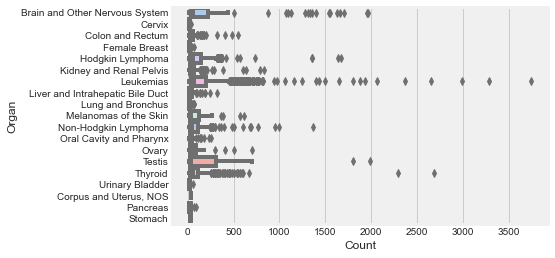

In [980]:
sns.boxplot(x=  'Count', y= 'Organ', data = cancerDF ,palette ="pastel", )

### we can see that number of death from Leukemias is the most

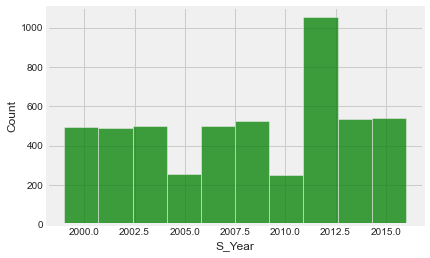

In [981]:
sns.histplot(cancerDF['S_Year'],bins=10 ,color ='green');


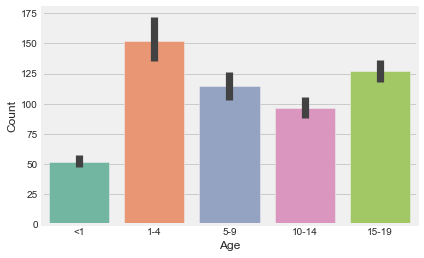

In [982]:
sns.barplot(data=cancerDF, x='Age', y= 'Count', order =['<1','1-4','5-9','10-14','15-19'], palette="Set2");

### Most incedence at age 1- 4

### before start build model.. I use dummies to 

In [983]:
cancerDF= pd.get_dummies(cancerDF, columns =['Gender','Age','Event'],drop_first =True)

In [1000]:
cancerDF

,Count,Race,Organ,S_Year,Gender_Male,Age_10-14,Age_15-19,Age_5-9,Age_<1,Event_Mortality
684,57,All Races,Brain and Other Nervous System,1999,0,0,0,0,0,1
685,66,All Races,Brain and Other Nervous System,1999,0,1,0,0,0,1
686,46,All Races,Brain and Other Nervous System,1999,0,0,1,0,0,1
693,88,All Races,Brain and Other Nervous System,1999,0,0,0,1,0,1
750,19,Black,Brain and Other Nervous System,1999,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
326155,40,All Races,Thyroid,2016,1,1,0,0,0,0
326156,119,All Races,Thyroid,2016,1,0,1,0,0,0
326232,22,Hispanic,Thyroid,2016,1,0,1,0,0,0
326250,28,White,Thyroid,2016,1,1,0,0,0,0


In [1001]:
cancerDF.corr()

,Count,S_Year,Gender_Male,Age_10-14,Age_15-19,Age_5-9,Age_<1,Event_Mortality
Count,1.000000,0.076003,0.033811,-0.053041,0.036415,-0.003679,-0.095139,-0.137360
S_Year,0.076003,1.000000,-0.011237,0.007122,-0.010107,0.010745,0.000652,-0.023122
Gender_Male,0.033811,-0.011237,1.000000,-0.009112,-0.021800,-0.004273,0.014938,0.034972
Age_10-14,-0.053041,0.007122,-0.009112,1.000000,-0.369147,-0.271409,-0.165988,-0.002138
Age_15-19,0.036415,-0.010107,-0.021800,-0.369147,1.000000,-0.324071,-0.198195,-0.023017
Age_5-9,-0.003679,0.010745,-0.004273,-0.271409,-0.324071,1.000000,-0.145720,0.065321
Age_<1,-0.095139,0.000652,0.014938,-0.165988,-0.198195,-0.145720,1.000000,-0.105748
Event_Mortality,-0.137360,-0.023122,0.034972,-0.002138,-0.023017,0.065321,-0.105748,1.000000


Text(0.5, 1.0, 'cancerDF.corr()')

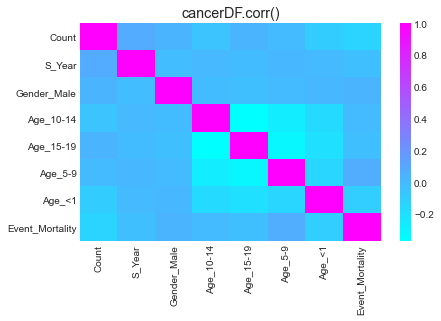

In [1002]:
sns.heatmap(cancerDF.corr(), cmap='cool');
plt.title ('cancerDF.corr()')

In [1018]:
cancerDF.groupby(['Organ','Event_Mortality'])['Count'].max()

Organ                             Event_Mortality
Brain and Other Nervous System    0                  1967
                                  1                   507
Cervix                            0                    41
Colon and Rectum                  0                   547
Corpus and Uterus, NOS            0                    40
Female Breast                     0                    72
Hodgkin Lymphoma                  0                  1673
                                  1                    20
Kidney and Renal Pelvis           0                   837
                                  1                    37
Leukemias                         0                  3742
                                  1                   476
Liver and Intrahepatic Bile Duct  0                   318
                                  1                    58
Lung and Bronchus                 0                    74
Melanomas of the Skin             0                   617
Non-Hodgkin Lymphoma  

In [1030]:
X = cancerDF[[['Count'].max(),'Event_Mortality']]
y = cancerDF[['Organ']]

AttributeError: 'list' object has no attribute 'max'

In [1020]:
X_train = cancerDF.drop('Organ', axis=1)
y_train = cancerDF.Organ

In [1021]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=230)

In [1022]:
sc =StandardScaler()

In [1023]:
X_sc = sc.fit_transform(X_train)
y_sc = sc.transform(X_test)

In [1024]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/reemyousef/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/reemyousef/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1025]:
predictions = logmodel.predict(X_test)

In [1026]:
knn = KNeighborsClassifier(n_neighbors=7)

##### knn.fit(X_train, y_train)

In [1027]:
y_pred = knn.predict(X_test)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [1028]:
print(confusion_matrix(y_test,y_pred))

[[169   4   0   0  19   9 112   3   0   0  25   0   0   0   0   0   2   0]
 [  0   0   0   0   2   4   0   0   0   0   1   0   0   0   0   0   0   0]
 [  9   0   0   0   3   8  12   0   0   2   7   0   0   0   0   0   3   0]
 [  0   1   0   0   0   1   1   0   0   0   1   0   0   0   0   0   0   0]
 [ 39   4   0   0  17  12  26   1   0   3  14   0   2   0   0   0   6   0]
 [ 24   8   5   0  23  22  31   6   0   4  14   0   1   0   0   0   9   0]
 [160   3   2   0  30  28 159   6   0   3  20   0   4   0   0   3  13   0]
 [ 10   6   1   0   9  11  14   2   0   0  11   0   0   0   0   0   6   0]
 [  0   2   0   0   0   2   0   0   0   0   4   0   0   0   0   0   2   0]
 [ 16   2   1   0  10   9   8   2   0   3  10   0   0   0   0   0   1   0]
 [ 60   3   1   0  18  27  57   2   0   7  16   0   3   0   0   0   4   0]
 [ 15   1   0   0  11   7   6   3   0   1   8   0   0   0   0   0   4   0]
 [ 13   0   0   0   6  12  16   0   0   1   8   0   1   0   0   0   4   0]
 [  1   0   0   0   1   1

In [1029]:
print(classification_report(y_test,y_pred))

                                  precision    recall  f1-score   support

  Brain and Other Nervous System       0.31      0.49      0.38       343
                          Cervix       0.00      0.00      0.00         7
                Colon and Rectum       0.00      0.00      0.00        44
                   Female Breast       0.00      0.00      0.00         4
                Hodgkin Lymphoma       0.10      0.14      0.12       124
         Kidney and Renal Pelvis       0.13      0.15      0.14       147
                       Leukemias       0.34      0.37      0.35       431
Liver and Intrahepatic Bile Duct       0.07      0.03      0.04        70
               Lung and Bronchus       0.00      0.00      0.00        10
           Melanomas of the Skin       0.12      0.05      0.07        62
            Non-Hodgkin Lymphoma       0.11      0.08      0.09       198
         Oral Cavity and Pharynx       0.00      0.00      0.00        56
                           Ovary     

/Users/reemyousef/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reemyousef/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reemyousef/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [998]:
error_rate = []

# Will take some time
for i in range(1,6):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

/Users/reemyousef/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-998-24c1a75e8473>:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  error_rate.append(np.mean(pred_i != y_test))


ValueError: Unable to coerce to Series, length must be 1: given 1698

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

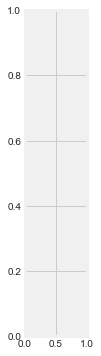

In [999]:
plt.figure(figsize=(1,6))
plt.plot(range(1,6),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')